# Qube 出力電力測定結果

- 測定期間：2022/4/5~7
- 測定者：根来，伊藤，塩見

各筐体のボート５〜８がそれぞれ１〜４列目に対応している．同じ筐体でも測定条件の異なるものは別の行にプロットした．横軸はRF，縦軸は出力電力に対応する，異なるLO毎に所望波の出力をプロットした．

In [1]:
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
import instruments
from instruments import MS2038_SPA
import scipy.signal

class Marker(object):
    @classmethod
    def find_peaks(cls, ary):
        x, y = ary[0], ary[1]
        i = scipy.signal.find_peaks(y)[0]
        j = np.argsort(y[i])
        return np.array([x[i][j], y[i][j]])
    
def extract_keys(o, label):
    return sorted(set([o[label] for o in data]),key=[o[label] for o in data].index)

def convert_plottable(o):
    lolist = extract_keys(o, 'LO')
    iflists = []
    tracelists = []
    for i in lolist:
        p = [j for j in o if j['LO'] == i]
        iflists.append(extract_keys(p, 'IF'))
        tracelist = []
        for q in p:
            tracelist.append(MS2038_SPA.new_array_freq_trace_pair(q, old_format=True))
        tracelists.append(tracelist)
    return {
        'TRACE': np.array(tracelists),
        'IF': np.array(iflists),
        'LO': np.array(lolist),
    }

QuBE Riken #1_1


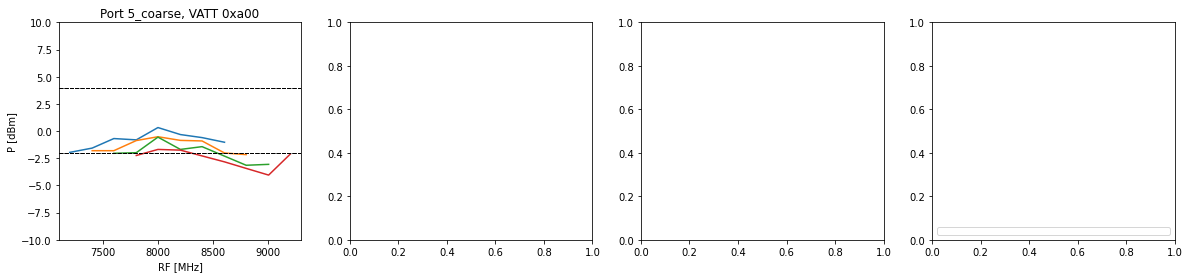

QuBE Riken #1_1


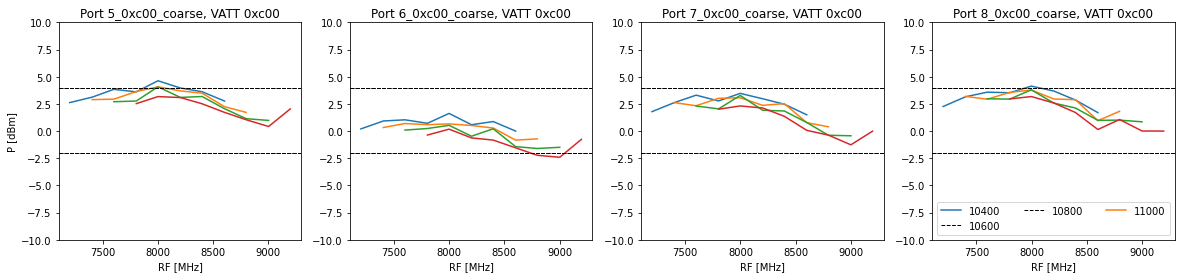

QuBE Riken #1_2


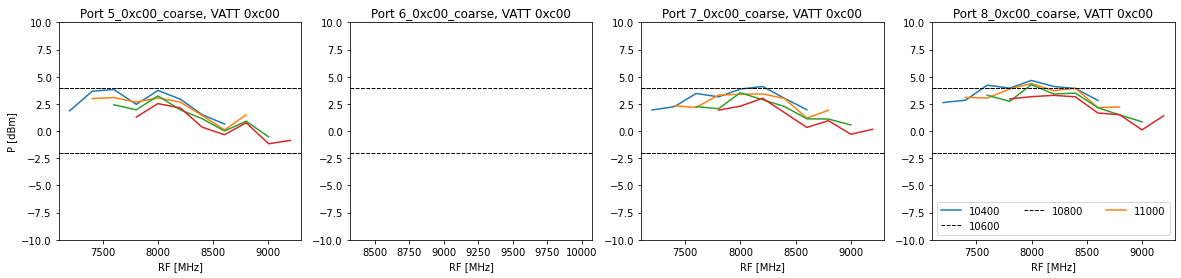

QuBE Riken #1_3


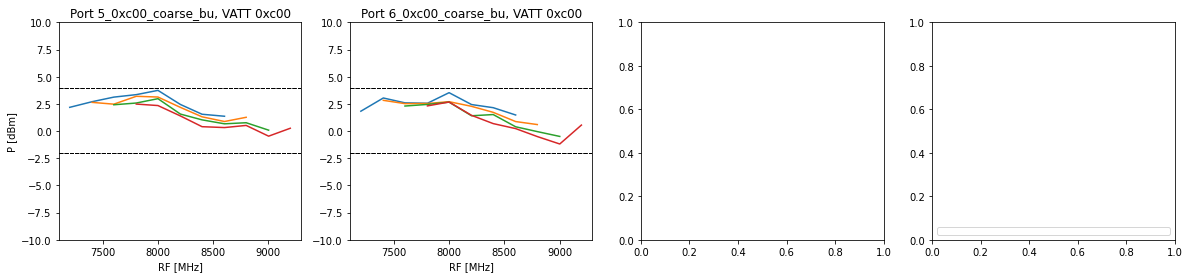

QuBE Riken #1_4


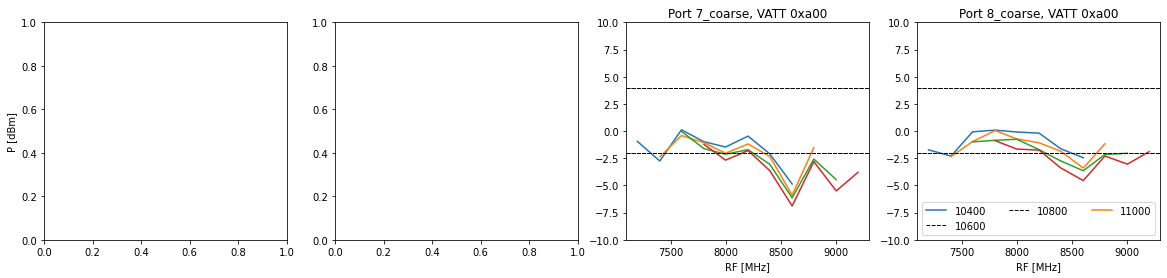

QuBE Riken #1_4


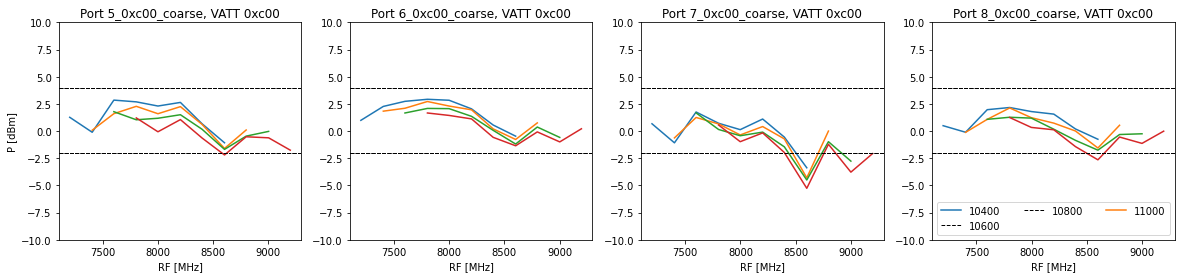

QuBE Riken #1_4


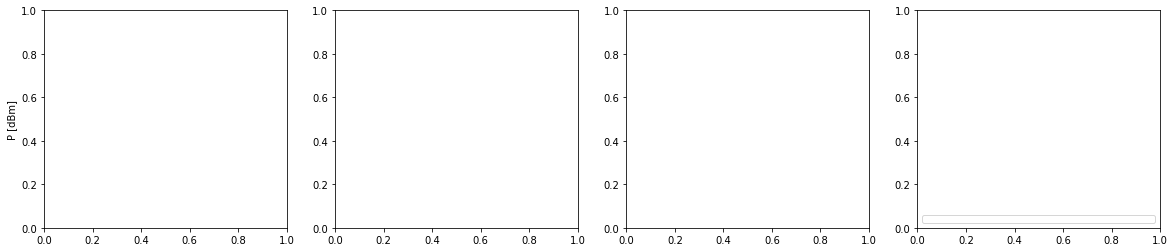

QuBE Riken #14


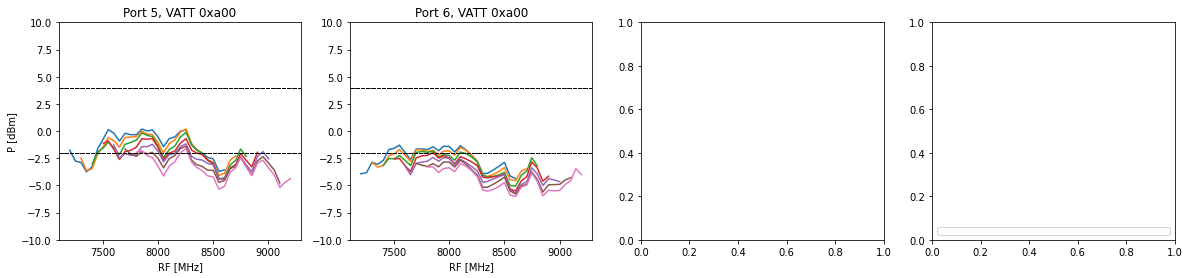

QuBE Riken #1_5


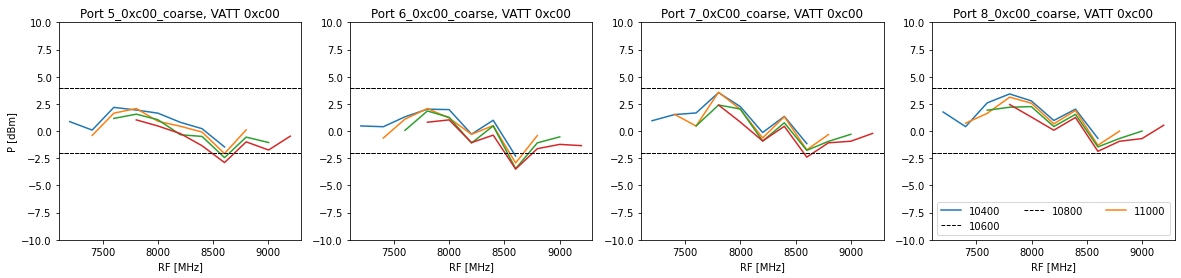

QuBE Riken #1_5


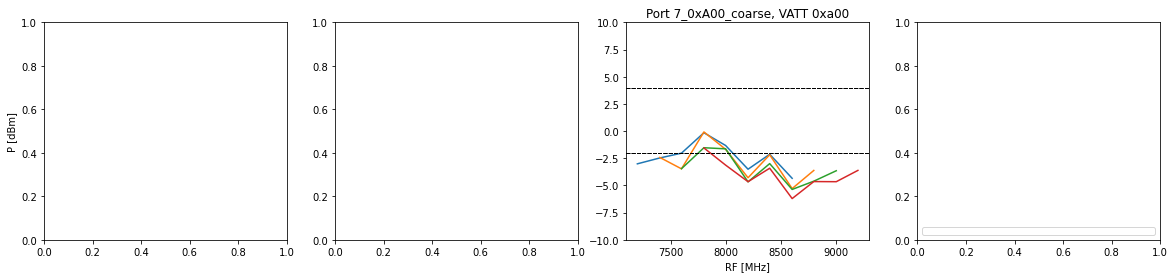

QuBE Riken #1_5


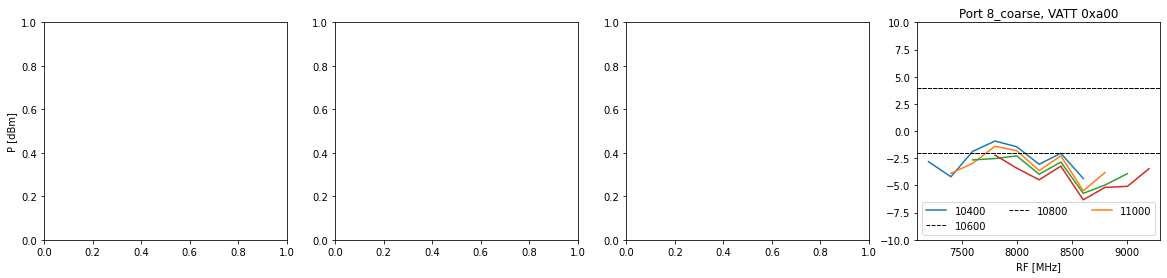

QuBE Riken #15


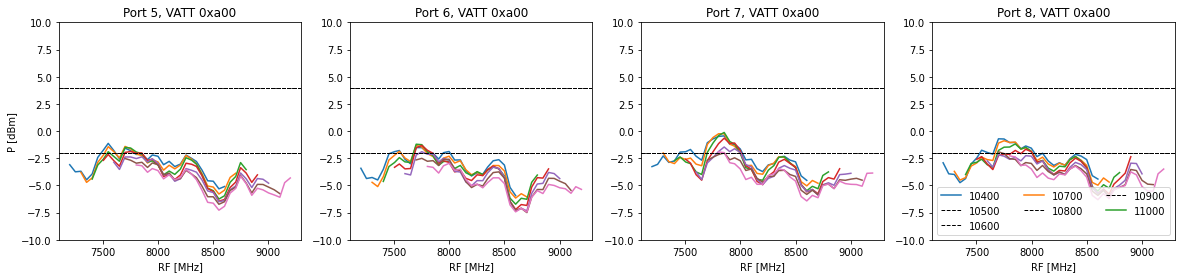

QuBE Riken #1_6


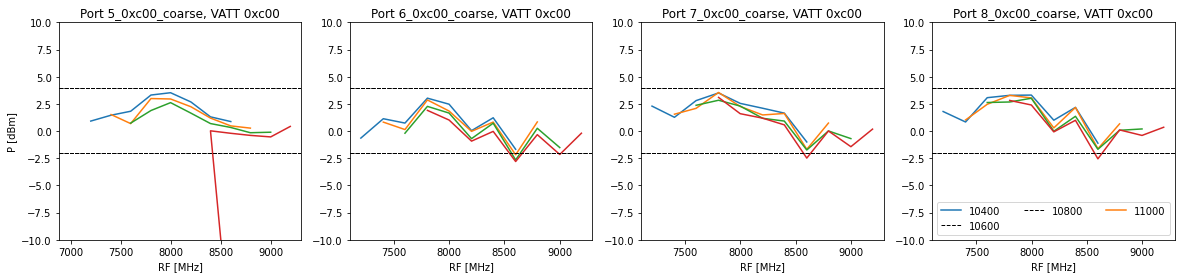

QuBE Riken #1_7


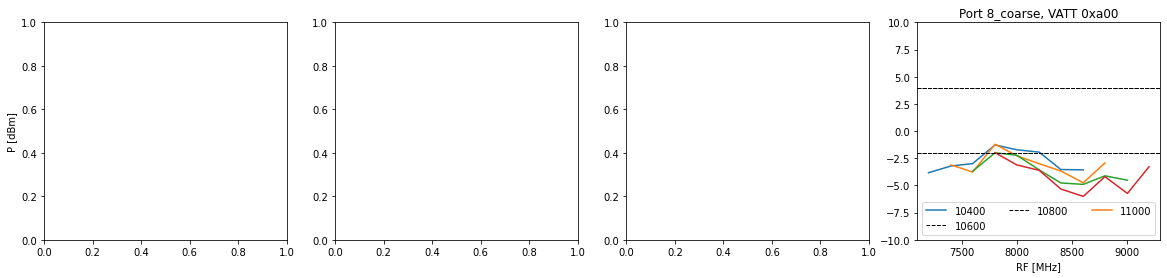

QuBE Riken #17


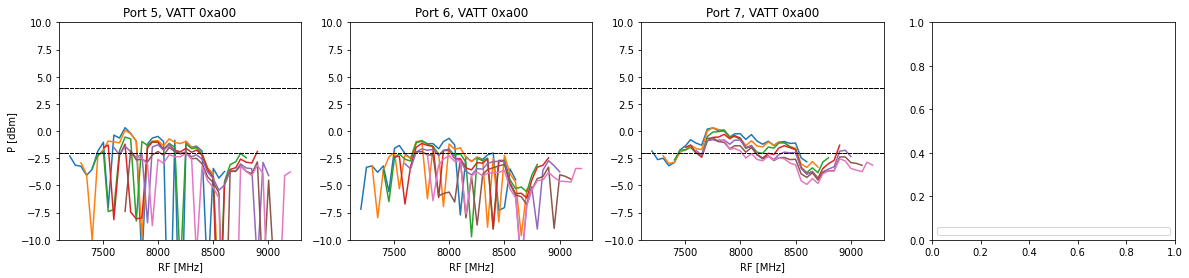

QuBE Riken #1_9


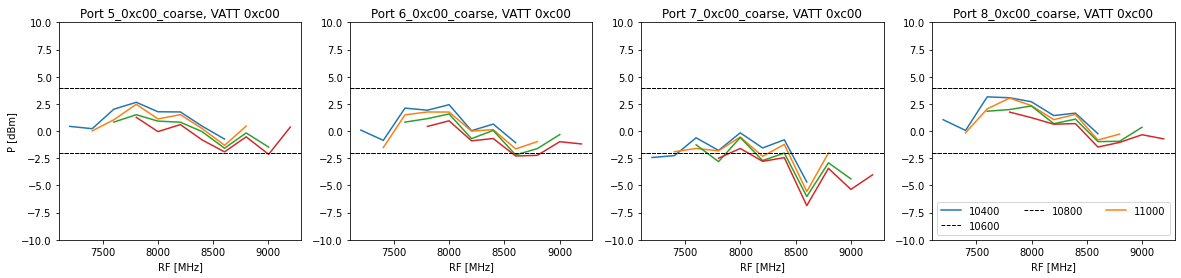

QuBE Riken #1_9


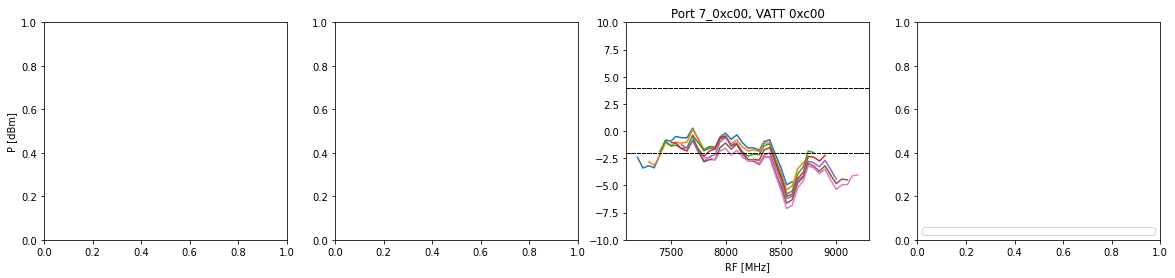

QuBE Riken #1_10


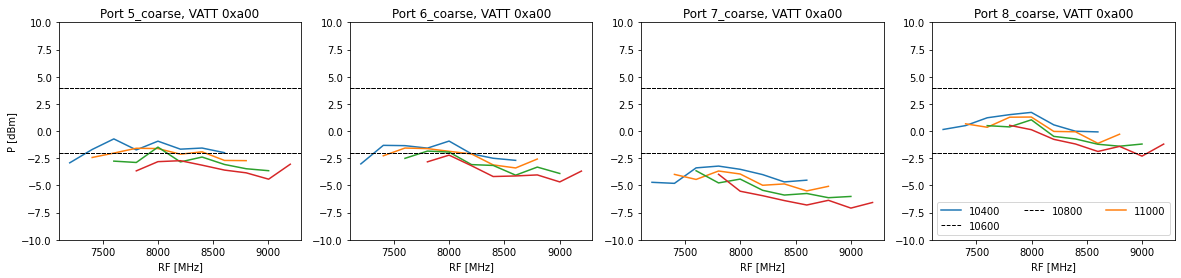

QuBE Riken #1_10


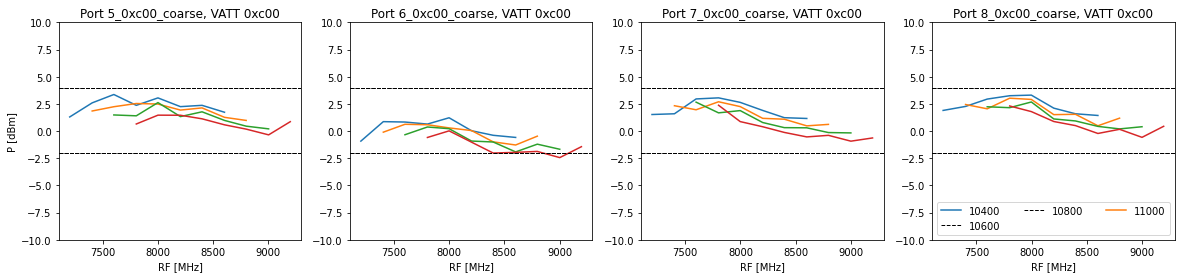

QuBE Riken #1_11


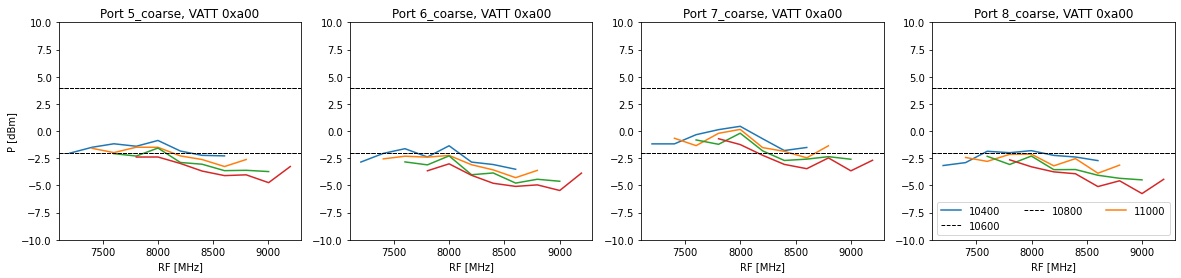

QuBE Riken #1_11


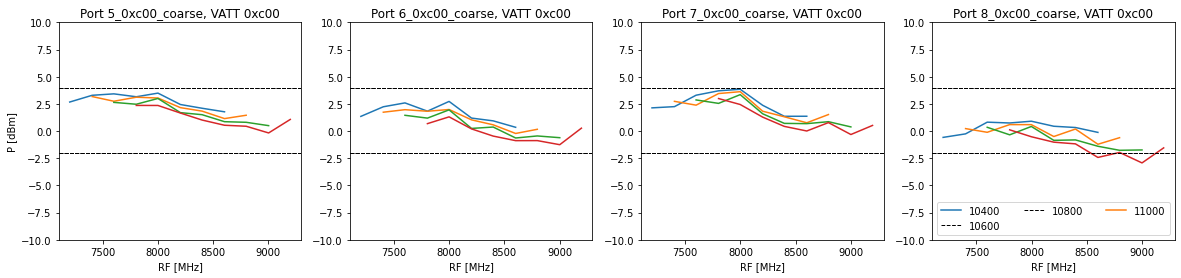

QuBE Riken #1_12


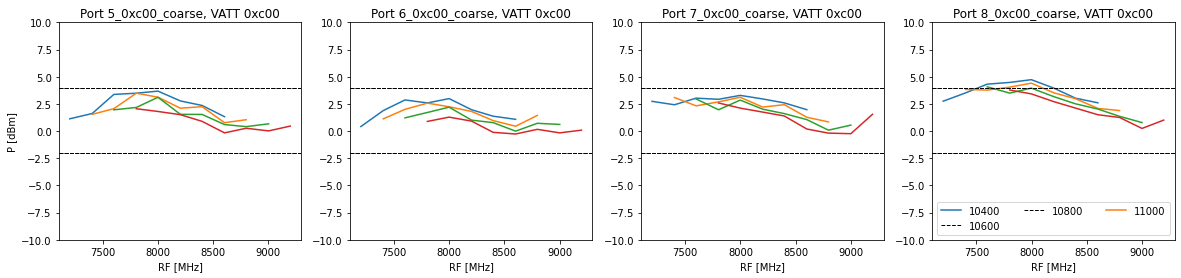

In [2]:
for l, m, n in [
    ('1_1',['5_coarse',],[0,]),
    ('1_1',['5_0xc00_coarse','6_0xc00_coarse','7_0xc00_coarse','8_0xc00_coarse'],[0, 1, 2, 3]),
    ('1_2',['5_0xc00_coarse','6_0xc00_coarse','7_0xc00_coarse','8_0xc00_coarse'],[0, 1, 2, 3]),
    ('1_3',['5_0xc00_coarse_bu','6_0xc00_coarse_bu'],[0, 1, 2]),
    ('1_4',['7_coarse','8_coarse'],[2,3]),
    ('1_4',['5_0xc00_coarse','6_0xc00_coarse','7_0xc00_coarse','8_0xc00_coarse'],[0,1,2,3]),
    ('1_4',['5_0xc00_coarse_bu',],[0,]),
    #('14',[5,6,7],[0,1,2]),
    ('14',[5,6,],[0,1,]),
    ('1_5',['5_0xc00_coarse','6_0xc00_coarse','7_0xC00_coarse','8_0xc00_coarse'],[0,1,2,3]),
    ('1_5',['7_0xA00_coarse',],[2,]),
    ('1_5',['8_coarse',],[3,]),
    ('15',[5,6,7,8],[0,1,2,3]),
    ('1_6',['5_0xc00_coarse','6_0xc00_coarse','7_0xc00_coarse','8_0xc00_coarse'],[0,1,2,3]),
    #('1_7',['8_0xc00_coarse',],[3,]),
    ('1_7',['8_coarse',],[3,]),
    ('17',[5,6,7],[0,1,2]),
    ('1_9',['5_0xc00_coarse','6_0xc00_coarse','7_0xc00_coarse','8_0xc00_coarse'],[0,1,2,3]),
    ('1_9',['7_0xc00',],[2,]),
    ('1_10',['5_coarse','6_coarse','7_coarse','8_coarse'],[0,1,2,3]),
    ('1_10',['5_0xc00_coarse','6_0xc00_coarse','7_0xc00_coarse','8_0xc00_coarse'],[0,1,2,3]),
    ('1_11',['5_coarse','6_coarse','7_coarse','8_coarse'],[0,1,2,3]),
    ('1_11',['5_0xc00_coarse','6_0xc00_coarse','7_0xc00_coarse','8_0xc00_coarse'],[0,1,2,3]),
    ('1_12',['5_0xc00_coarse','6_0xc00_coarse','7_0xc00_coarse','8_0xc00_coarse'],[0,1,2,3]),
]:
    print('QuBE Riken #{}'.format(l))
    fig = plt.figure(figsize=(20,4))
    axs = [fig.add_subplot(1,4,i+1) for i in range(4)]
    for i, j in zip(m,n):
        with open('../QuBE_Char/e7awg_sw/QubeRiken{}_Port{}.pickle'.format(l,i), 'rb') as f:
            data = pickle.load(f)
        c = convert_plottable(data)
        b = np.array([[Marker.find_peaks(c['TRACE'][i,j,:,:])[:,-1] for j, fi in enumerate(c['IF'][i,:])] for i, fl in enumerate(c['LO'])])
        for k, fl in enumerate(c['LO']):
            axs[j].set_title('Port {}, VATT {}'.format(i, hex(data[0]['VATT'])))
            axs[j].plot(b[k,:,0], b[k,:,1])
            axs[j].axhline(y=4, color='black', lw=1, linestyle='dashed')
            axs[j].axhline(y=-2, color='black', lw=1, linestyle='dashed')
            axs[j].set_ylim(-10,10)
            axs[j].set_xlabel('RF [MHz]')
        axs[0].set_ylabel('P [dBm]')
        axs[-1].legend(c['LO'],loc = "lower center", ncol = 3, mode="expand")
    plt.show()